In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings#to cancel any warnings
warnings.filterwarnings('ignore')

## a) Import data 
## b) display data 


In [14]:
df=pd.read_csv('walmart-sales-dataset-of-45stores.csv')
df.sample(15)    # we take sample To understand this data 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3099,22,09-12-2011,1308967.44,0,45.35,3.470,140.439786,7.706
5684,40,24-02-2012,919301.81,0,29.88,3.751,137.341103,4.261
765,6,21-01-2011,1261253.18,0,46.20,3.016,213.339965,6.858
986,7,20-07-2012,686345.69,0,62.87,3.585,197.929038,7.872
5769,41,14-01-2011,1052609.16,0,22.44,2.911,191.478494,7.241
5364,38,01-07-2011,387334.04,0,89.85,3.842,129.089400,13.503
4126,29,08-06-2012,554093.15,0,61.71,3.746,138.117419,9.140
1184,9,12-11-2010,520846.68,0,61.59,2.728,215.555730,6.560
1211,9,20-05-2011,518266.90,0,70.49,3.907,219.362281,6.380
2951,21,04-11-2011,767358.37,0,56.01,3.332,217.485361,7.441


## c) visualize quantitive variables distributions 


In [15]:
new_data = df[["Temperature", "Fuel_Price", "CPI", "Unemployment"]]

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>]], dtype=object)

<Figure size 1000x700 with 0 Axes>

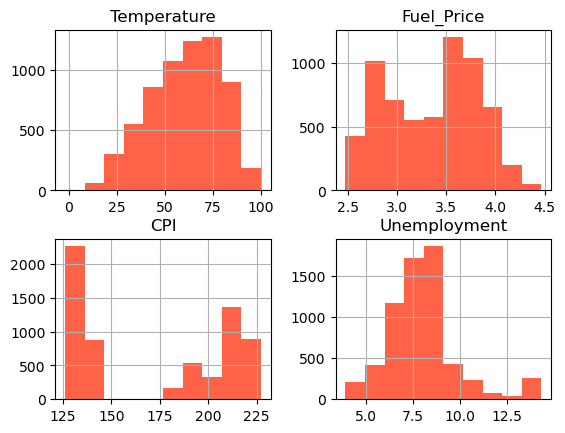

In [16]:
plt.figure(figsize = (10,7))
new_data.hist(color="tomato")

## d) perform data cleaning

In [17]:
df.info()#we check if we have any null value but we don't have it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [18]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [19]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [20]:
#check duplicated 
df.duplicated() ##no any duplicate in data 

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [21]:
df.Date = pd.to_datetime(df.Date) ##to convert the date into date form

In [22]:
#seprate month and year from data frame
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19


# a) Which store has maximum sales?

In [23]:
max_store_with_largest_store=df.groupby('Store')['Weekly_Sales'].sum().idxmax()#name of store
max_store_with_largest_sales=df.groupby('Store')['Weekly_Sales'].sum().max()#max of sales
print('the store which has max sales is {} and weekly sales for store is: {}$ '
      .format(max_store_with_largest_store,max_store_with_largest_sales))
####Store-20 has the maximum sales of $301,397,79


the store which has max sales is 20 and weekly sales for store is: 301397792.46$ 


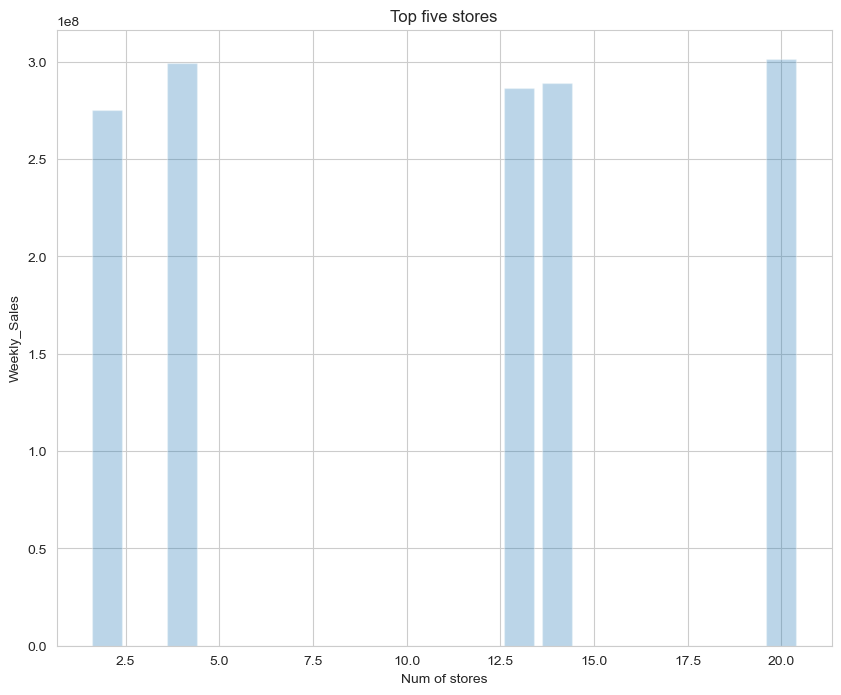

In [45]:
#we have top 5 store 
x=df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False).head().to_frame().reset_index()
plt.figure(figsize=(10,8))
plt.bar(x['Store'],x['Weekly_Sales'],alpha=.3)
plt.title('Top five stores')
plt.xlabel('Num of stores')
plt.ylabel('Weekly_Sales')
plt.show()

# b) Which store has maximum standard deviation i.e., the sales vary a lot

In [25]:
max_store_with_largest_store=df.groupby('Store')['Weekly_Sales'].std().idxmax()
max_store_with_largest_sales=df.groupby('Store')['Weekly_Sales'].std().max()
print('the store which has max STD is {} and STD is: {} '.format(max_store_with_largest_store,max_store_with_largest_sales))

the store which has max STD is 14 and STD is: 317569.9494755081 


# c) Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

In [26]:
##info about holiday
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012'] ##data of holidays 
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']


# Calculating holiday events sales
Super_Bowl_sales = round(df.loc[df.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_sales = round(df.loc[df.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_sales = round(df.loc[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_sales = round(df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)
Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales

(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [27]:
#non holiday
non_holiday_sales = round(df.query('Holiday_Flag == 0')['Weekly_Sales'].mean(),2)
non_holiday_sales

1041256.38

In [28]:
result = {'Super Bowl Sales':Super_Bowl_sales,  ##input this data as dictionary
              'Labour Day Sales':Labour_Day_sales,
              'Thanksgiving Sales':Thanksgiving_sales,
              'Christmas Sales':Christmas_sales,
              'Non Holiday Sales':non_holiday_sales}

result

{'Super Bowl Sales': 1079127.99,
 'Labour Day Sales': 1042427.29,
 'Thanksgiving Sales': 1471273.43,
 'Christmas Sales': 960833.11,
 'Non Holiday Sales': 1041256.38}

In [29]:
for i in result:     ##to know which holiday is higher than non_holiday
    if(result[i]>non_holiday_sales):
        print('{} higher than the mean sales in the non-holiday season'.format(i))
    

Super Bowl Sales higher than the mean sales in the non-holiday season
Labour Day Sales higher than the mean sales in the non-holiday season
Thanksgiving Sales higher than the mean sales in the non-holiday season


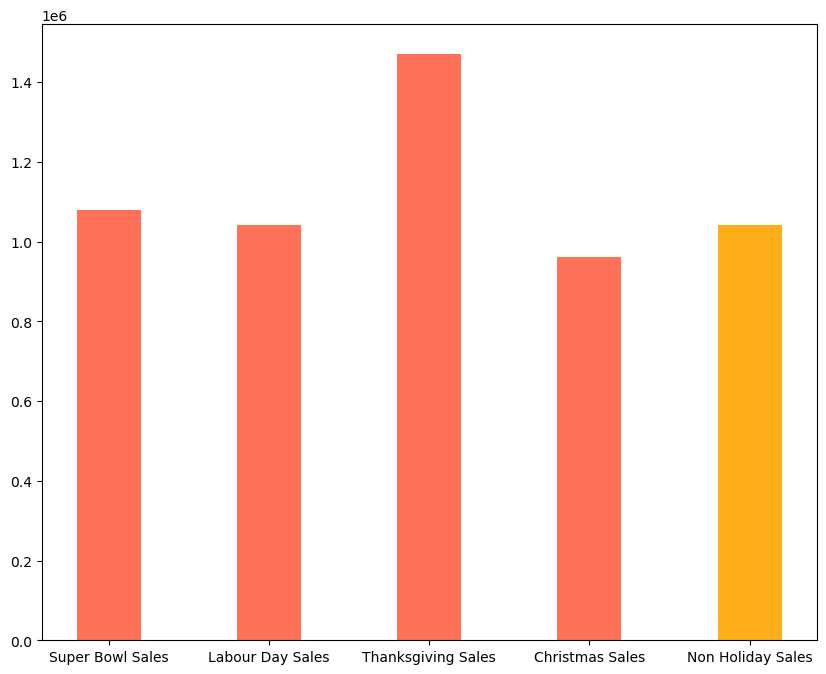

In [30]:
c=['tomato','tomato','tomato','tomato','orange']
plt.figure(figsize=(10,8))
plt.bar(result.keys(), result.values(), color =c,width = 0.4,alpha=0.9);

## Thanksgiving has the highest sales (1,471,273.43) than non-holiday sales (1,041,256.38).


# d) Provide a monthly and semester view of sales in units and give insights.

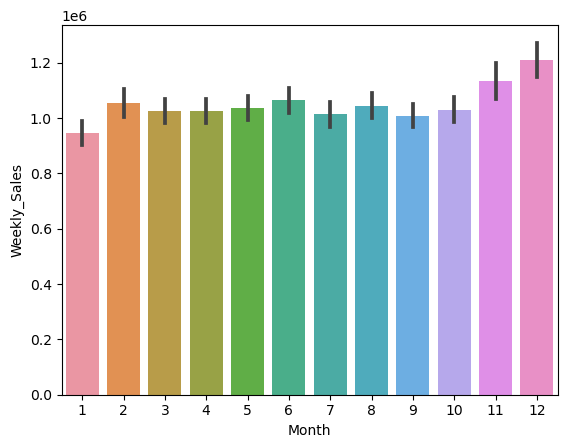

In [31]:
# monthly view of sales
sns.barplot(data=df,x='Month',y='Weekly_Sales');
#df.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar',legend=False);

## I found that: December month has the highest weekly sales

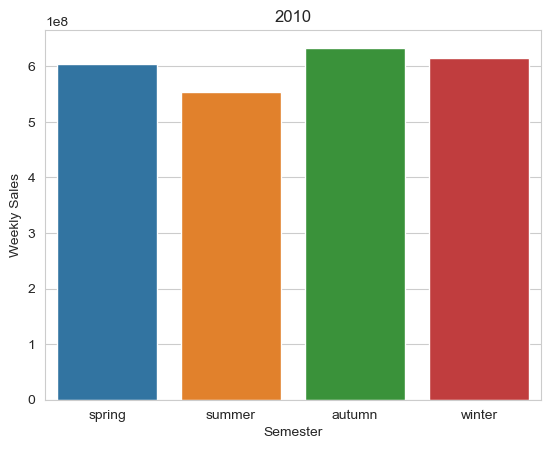

In [32]:
# 2010 semesters
dx=df.set_index('Date').sort_values('Date')
spring=dx.loc['2010-03-20':'2010-06-20'].Weekly_Sales.sum()
summer=dx.loc['2010-06-21':'2010-09-22'].Weekly_Sales.sum()
autumn=dx.loc['2010-09-23':'2010-12-21'].Weekly_Sales.sum()
winter=dx.loc['2010-12-22':'2011-03-20'].Weekly_Sales.sum()

dxx=pd.DataFrame({"spring":spring,
                  "summer":summer,
                  "autumn":autumn,
                  "winter":winter},index=[0])
sns.set_style("whitegrid")
sns.barplot(data=dxx).set(xlabel ="Semester", ylabel = "Weekly Sales", title ='2010');


## I found that: autumn semester  has the highest weekly sales in year of 2010

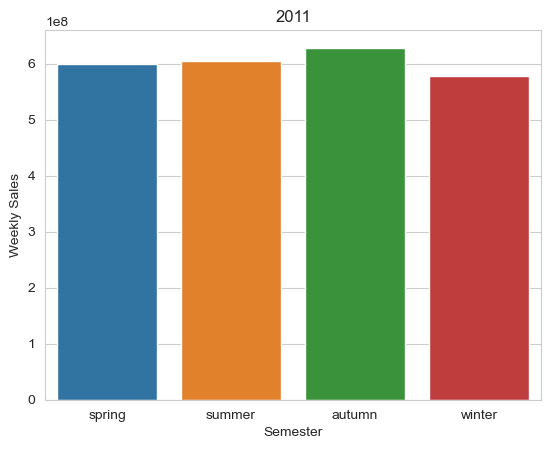

In [33]:
# 2011 semesters
dx=df.set_index('Date').sort_values('Date')
spring=dx.loc['2011-03-21':'2011-06-20'].Weekly_Sales.sum()
summer=dx.loc['2011-06-21':'2011-09-22'].Weekly_Sales.sum()
autumn=dx.loc['2011-09-23':'2011-12-21'].Weekly_Sales.sum()
winter=dx.loc['2011-12-22':'2012-03-20'].Weekly_Sales.sum()

dxx=pd.DataFrame({"spring":spring,
                  "summer":summer,
                  "autumn":autumn,
                  "winter":winter},index=[0])
sns.set_style("whitegrid")
sns.barplot(data=dxx).set(xlabel ="Semester", ylabel = "Weekly Sales", title ='2011');

## I found that: autumn semester  has the highest weekly sales in year of 2010

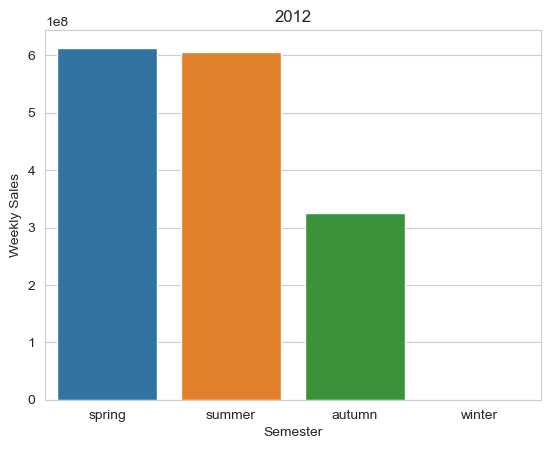

In [34]:
# 2012 semesters
dx=df.set_index('Date').sort_values('Date')
spring=dx.loc['2012-03-20':'2012-06-20'].Weekly_Sales.sum()
summer=dx.loc['2012-06-21':'2012-09-21'].Weekly_Sales.sum()
autumn=dx.loc['2012-09-22':'2012-12-20'].Weekly_Sales.sum()
winter=dx.loc['2012-12-21':'2013-03-19'].Weekly_Sales.sum()

dxx=pd.DataFrame({"spring":spring,
                  "summer":summer,
                  "autumn":autumn,
                  "winter":winter},index=[0])
sns.set_style("whitegrid")
sns.barplot(data=dxx).set(xlabel ="Semester", ylabel = "Weekly Sales", title ='2012');

## I found that: spring semester has the highest weekly sales in year of 2010

Text(0.5, 1.0, '2012')

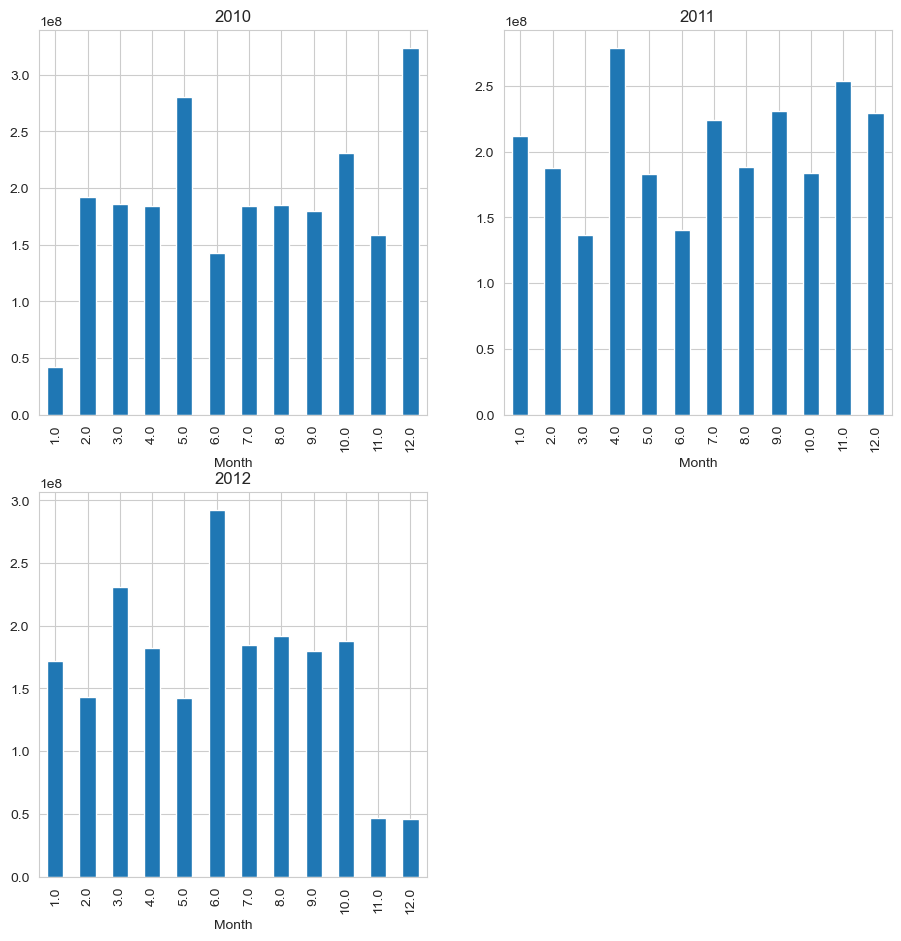

In [47]:
fig = plt.figure(figsize=(11,11))
ax=plt.subplot2grid((2,2),(0,0))
x=df[df.Year==2010]["Month"]
df.groupby(x)['Weekly_Sales'].sum().round().plot(kind='bar',legend=False);
plt.title('2010')

ax=plt.subplot2grid((2,2),(0,1))
y=df[df.Year==2011]["Month"]
df.groupby(y)['Weekly_Sales'].sum().round().plot(kind='bar',legend=False);
plt.title('2011')

ax=plt.subplot2grid((2,2),(1,0))
z=df[df.Year==2012]["Month"]
df.groupby(z)['Weekly_Sales'].sum().round().plot(kind='bar',legend=False);
plt.title('2012')

## i found that: December month has the highest weekly sales in year of 2010
## i found that: April month has the highest weekly sales in year of 2011
## i found that: June month has the highest weekly sales in year of 2012


## e) Plot the relations between weekly sales vs. other numeric features
## and give insights.

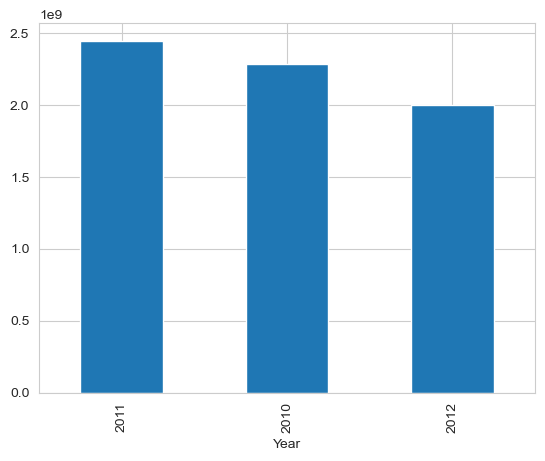

In [48]:
# yearly view of sales
df.groupby('Year')['Weekly_Sales'].sum().round().sort_values(ascending=False).to_frame().plot(kind='bar',legend=False);

## Year 2011 has the highest sales and 2012 has the lowest sales.¶


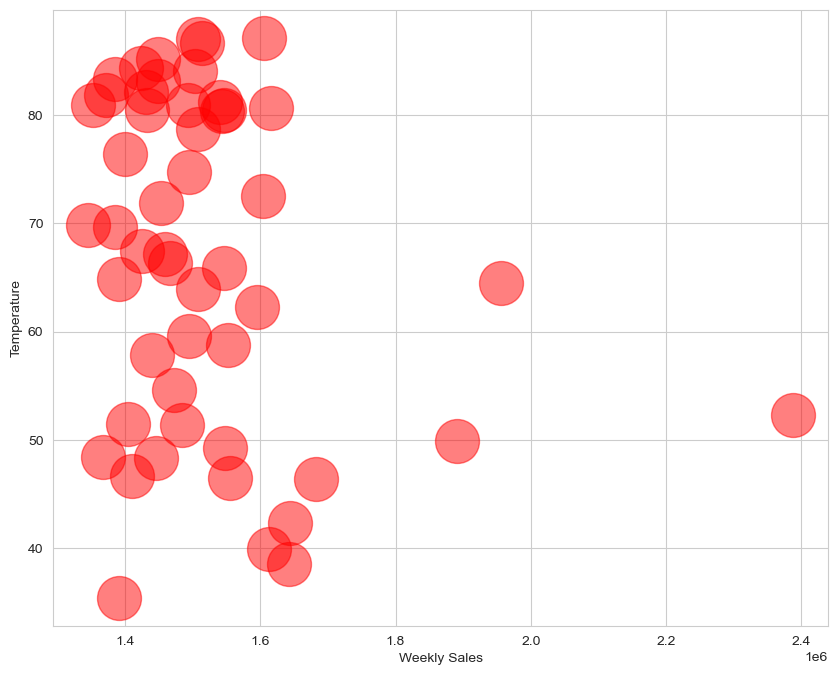

In [54]:
z = np.random.rand(150)
plt.figure(figsize=(10, 8))
plt.xlabel("Weekly Sales")
plt.ylabel("Temperature")
plt.scatter(df['Weekly_Sales'].head(50),df['Temperature'].head(50),color='red',s= 1000, alpha=0.5);

## i found that: when the Temperature is 80 or above ..> the weekly sales is high 

## i found that: when the Temperature is [50 : 60 ] ..> the weekly sales is low


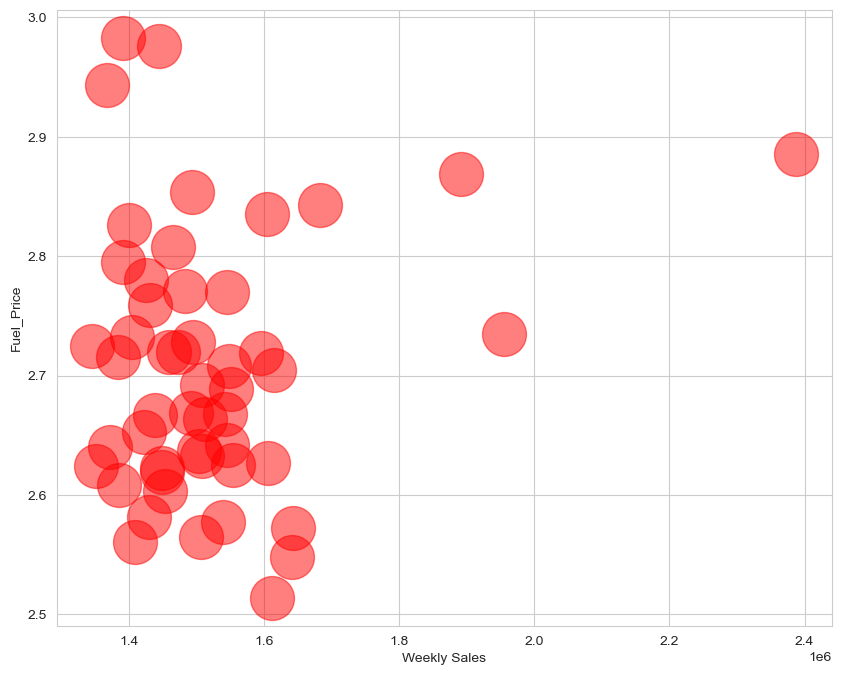

In [39]:
z = np.random.rand(150)
plt.figure(figsize=(10, 8))
plt.xlabel("Weekly Sales")
plt.ylabel("Fuel_Price")
plt.scatter(df['Weekly_Sales'].head(50),df['Fuel_Price'].head(50),color='red',s= 1000, alpha=0.5);

## i found that when fuel_price is increased , the weekly sales is decreased

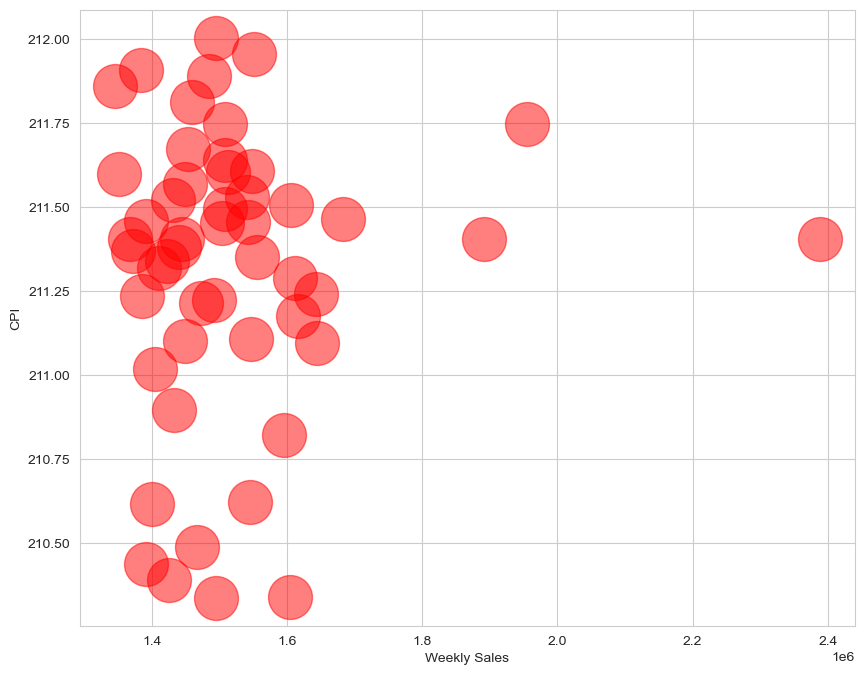

In [40]:
z = np.random.rand(150)
plt.figure(figsize=(10, 8))
plt.xlabel("Weekly Sales")
plt.ylabel("CPI")
plt.scatter(df['Weekly_Sales'].head(50),df['CPI'].head(50),color='red',s= 1000, alpha=0.5);

## i found that when CPI is increased , the weekly sales is decreased

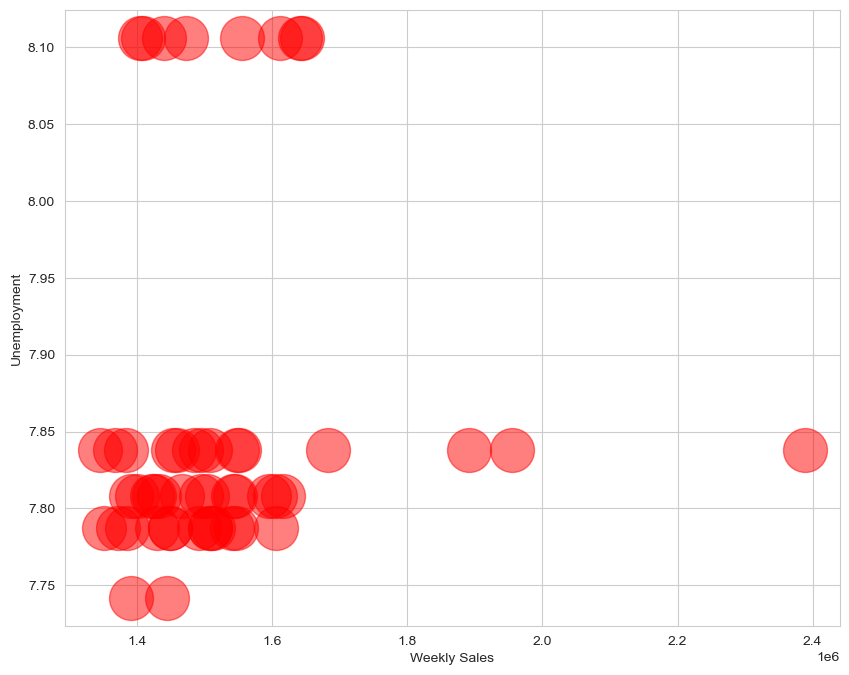

In [41]:
z = np.random.rand(150)
plt.figure(figsize=(10, 8))
plt.xlabel("Weekly Sales")
plt.ylabel("Unemployment")
plt.scatter(df['Weekly_Sales'].head(50),df['Unemployment'].head(50),color='red',s= 1000, alpha=0.5);

## i found that when Unemployment is increased , the weekly sales is decreased